In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model

In [3]:
(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 55s 0us/step


In [4]:
x_train = x_train.reshape((-1, 32, 32, 3))
x_test = x_test.reshape((-1, 32, 32, 3))

In [5]:
input_img = Input(shape=(32, 32, 3))

In [6]:
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

In [7]:
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [8]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - loss: 0.5925 - val_loss: 0.5628
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.5619 - val_loss: 0.5599
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - loss: 0.5585 - val_loss: 0.5588
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5580 - val_loss: 0.5581
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5574 - val_loss: 0.5577
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5567 - val_loss: 0.5571
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5564 - val_loss: 0.5571
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5563 - val_loss: 0.5562
Epoch 9/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - loss: 0.5556 - val_loss: 0.5558
Epoch 10/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - loss: 0.5549 - val_loss: 0.5556
Epoch 11/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - loss: 0.5551 - val_loss: 0.5552
Epoch 12/50
391/391 ━━━━━━━━━

In [10]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


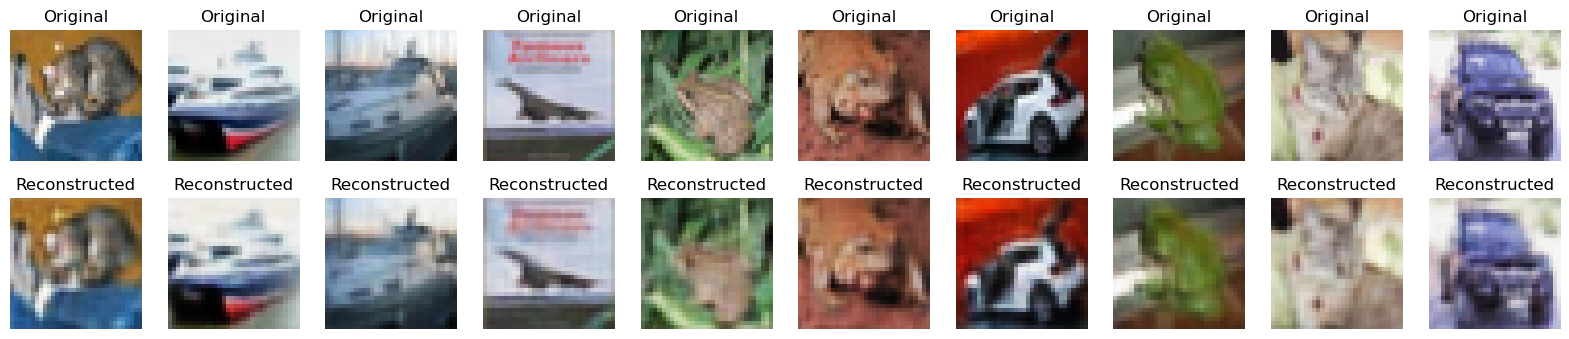

In [13]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")
    
    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
